In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [3]:
voice_data = pd.read_csv('voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
voice_data.isnull().sum().sum()

0

In [7]:
# Формируем обучающую и тестовую выборки
X = voice_data.drop('label', axis=1)
y = voice_data['label']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


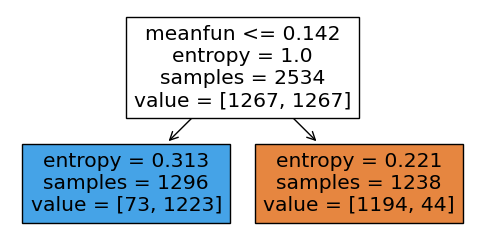

In [14]:
#Задание 7.1
#Начнём с решающего пня.
#Создайте модель дерева решений максимальной глубины 1. В качестве критерия информативности используйте энтропию Шеннона.
#Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

dt = tree.DecisionTreeClassifier(max_depth=1, criterion='entropy')
dt.fit(X_train, y_train)

fig = plt.figure(figsize=(6, 3))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    filled=True, 
    impurity=True
);

In [15]:
y_test_pred = dt.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.9558359621451105

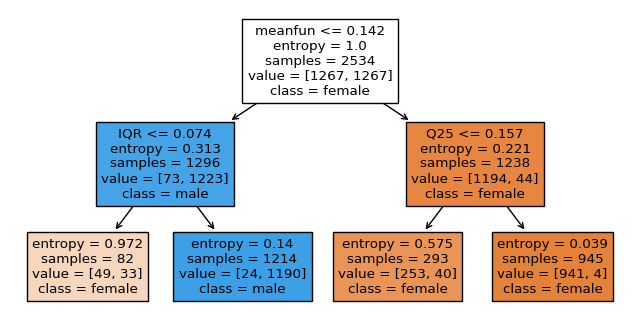

In [18]:
#Задание 7.2

#Увеличим глубину дерева.
#Создайте дерево решений с максимальной глубиной 2. В качестве критерия информативности используйте энтропию Шеннона.
#Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

dt = tree.DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt.fit(X_train, y_train)

fig = plt.figure(figsize=(8, 4))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    filled=True, 
    impurity=True,
    class_names=dt.classes_
);

In [19]:
y_test_pred = dt.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.9621451104100947

In [ ]:
#Задание 7.3

#Давайте дадим дереву решений полную свободу.
#Создайте дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности используйте энтропию Шеннона.

#В качестве значения параметра random_state возьмите 0.

#Обучите модель на тренировочной выборке.

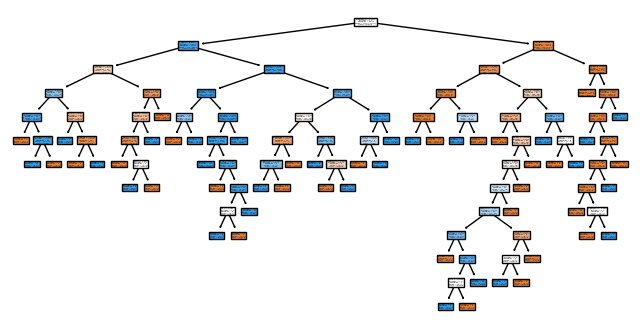

In [20]:
dt = tree.DecisionTreeClassifier(random_state=0, criterion='entropy')
dt.fit(X_train, y_train)

fig = plt.figure(figsize=(8, 4))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    filled=True, 
    impurity=True,
    class_names=dt.classes_
);

In [23]:
dt.get_depth()

12

In [24]:
dt.get_n_leaves()

54

In [25]:
y_test_pred = dt.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.973186119873817

In [26]:
y_train_pred = dt.predict(X_train)
metrics.accuracy_score(y_train, y_train_pred)

1.0

In [27]:
#Задание 7.4

#Давайте попробуем найти оптимальные внешние параметры модели дерева решений для поставленной задачи. 
# Воспользуемся классическим методом подбора гиперпараметров — перебором на сетке с кросс-валидацией (Grid SearchCV).

#Задана следующая сетка параметров:

# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}
#В качестве кросс-валидатора будем использовать k-fold-валидатор со стратификацией (StratifiedKFold):

# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)
#С помощью Grid SearchCV из модуля model_selection библиотеки sklearn переберите гиперпараметры
# дерева решений из приведённой сетки на обучающей выборке и найдите оптимальные. 
# Параметр random_state для дерева решений установите равным 0. 
# В качестве метрики качества (параметр scoring) используйте accuracy.

In [29]:
gs = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=0),
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1
    
)

gs.fit(X_train, y_train) 

print("accuracy на тестовом наборе: {:.3f}".format(gs.score(X_test, y_test)))
y_test_pred = gs.predict(X_test)
print('accuracy на тренирововчном наборе: {:.3f}'.format(gs.score(X_train, y_train)))
print("Наилучшие значения гиперпараметров: {}".format(gs.best_params_))

accuracy на тестовом наборе: 0.970
accuracy на тренирововчном наборе: 0.996
Наилучшие значения гиперпараметров: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}


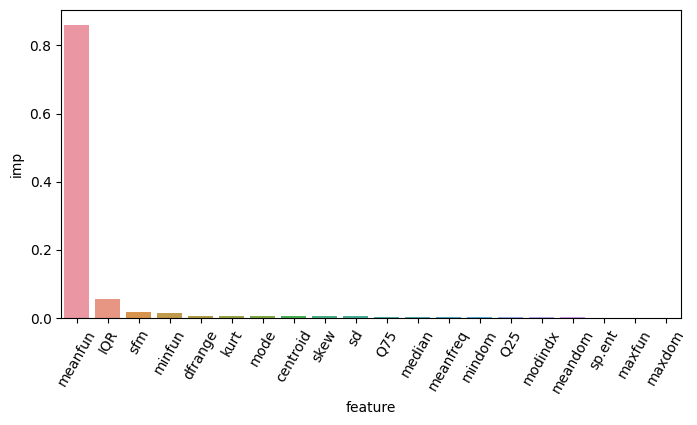

In [62]:
dt = gs.best_estimator_
imp = list(dt.feature_importances_)
df = pd.DataFrame(imp, index=list(X.columns), columns=['imp'])
df = df.reset_index().rename({'index' : 'feature'}, axis=1)
df = df.sort_values(['imp'], ascending=False)
fig, ax = plt.subplots(1,1,figsize=(8, 4))
bar = sns.barplot(df, x=df['feature'], y=df['imp'], ax=ax)
bar.xaxis.set_tick_params(rotation= 60)